In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\vamsi\AppData\Local\Temp\ipykernel_30680\1220861247.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [10]:
df= pd.read_csv("C:/Users/vamsi/OneDrive/Documents/ai_assgn.csv")
x=df.drop(["Yeild (Q/acre)"],axis=1)
y=df["Yeild (Q/acre)"]
z=np.array(y).reshape(-1,1)
df.head()

,Rain Fall (mm),Fertilizer(urea) (kg/acre),Temperature (°C),Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230,80,28,80,24,20,12.0
1,480,60,36,70,20,18,8.0
2,1250,75,29,78,22,19,11.0
3,450,65,35,70,19,18,9.0
4,1200,80,27,79,22,19,11.0


In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x)
y = sc_y.fit_transform(z.reshape(-1,1))


'from sklearn.model_selection import train_test_split\nx_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)\nprint(x_train.shape)\nprint(x_test.shape)\nprint(y_train.shape)\nprint(y_test.shape)'

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

'X = df.iloc[:, :-1].values\ny = df.iloc[:,-1].values\ny = np.array(y).reshape(-1,1)'

In [19]:
from sklearn.svm import SVR
regressor= SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)


c:\Users\vamsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [14]:
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred.reshape(-1,1))


In [15]:
print("slno    Real              Predicted")
print()

g=sc_y.inverse_transform(y_test.reshape(-1,1))
for i in range (0,20) :
    print(i,"      ",g[i][0],end="        ")
    print(y_pred[i][0])

slno    Real              Predicted

0        11.0        10.871699830898038
1        7.0        6.835678515299798
2        10.0        10.185256964520214
3        8.0        7.502967498955494
4        6.0        6.1588172811238255
5        9.0        10.797391172343442
6        7.5        8.080270109904015
7        12.0        11.506598606005756
8        10.5        11.194392210036488
9        8.5        6.820724064373586
10        12.0        11.505306955584594
11        7.0        7.2719480808674515
12        7.0        7.18634640902877
13        7.0        7.611909624354944
14        11.0        10.455048976171943
15        10.0        9.73502902911801
16        11.0        10.612936476055353
17        9.5        10.818585491039668
18        9.0        8.063718514836204
19        6.0        6.50221844355298


In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_pred = regressor.predict(X_test)
r2 = round(r2_score(y_test, y_pred),3)
absolute = round(mean_absolute_error(y_test, y_pred),3)
squared = round(mean_squared_error(y_test, y_pred),3)

In [21]:

print()
print("r2_score:")
print(r2)
print()
print("mean_absolute_error:")
print(absolute)
print()
print("mean_squared_error")
print(squared)
print()


r2_score:
0.839

mean_absolute_error:
0.304

mean_squared_error
0.151



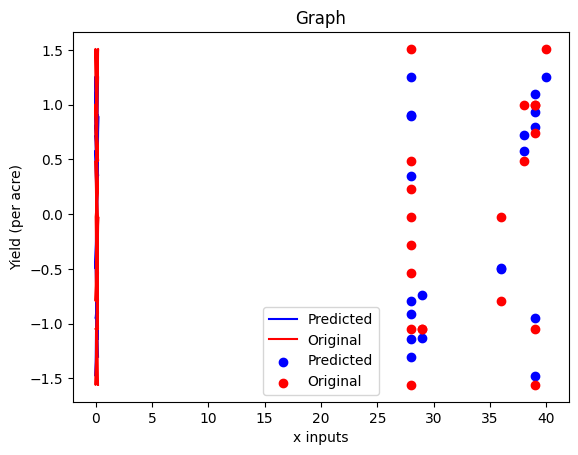

In [29]:
#PLOT SOC(t):
plt.plot((df.iloc[-len(y_pred):,0] - df.iloc[-len(y_pred),0])/3600,y_pred, label = 'Predicted', color = 'b')
plt.plot((df.iloc[-len(y_pred):,0] - df.iloc[-len(y_pred),0])/3600,y_test, label = 'Original', color = 'r')
plt.ylabel('SoC (%)')
plt.xlabel('Time (Hour)')
plt.title('SoC(t)')
plt.legend()


#PLOT SOC(V):
plt.scatter(df.iloc[-len(y_pred):,2], y_pred, label = 'Predicted', color = 'b')
plt.scatter(df.iloc[-len(y_pred):,2],y_test, label = 'Original', color = 'r')
plt.title('Graph')
plt.xlabel('x inputs')
plt.ylabel('Yield (per acre)')
plt.legend()
plt.show()

MULTIPLE LINEAR REGRESSION

In [30]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
Y_pred = model.predict(X_test)
k=sc_y.inverse_transform(Y_pred.reshape(-1,1))

print("slno    Real              Predicted")
print()

g=sc_y.inverse_transform(y_test.reshape(-1,1))
for i in range (0,20) :
    print(i,"      ",g[i][0],end="        ")
    print(k[i][0])

slno    Real              Predicted

0        11.0        10.88098860367203
1        7.0        6.270580757207242
2        10.0        10.454424357451966
3        8.0        7.535778616778323
4        6.0        5.895907827377071
5        9.0        10.784683762660096
6        7.5        7.936815434368026
7        12.0        11.125197030915578
8        10.5        11.250166797639052
9        8.5        7.005332515677246
10        12.0        11.14031964634955
11        7.0        7.63353931125938
12        7.0        7.428714948800416
13        7.0        7.8220219571728515
14        11.0        10.473790016507582
15        10.0        9.961926477831199
16        11.0        10.764227168212287
17        9.5        10.87090171706895
18        9.0        8.621174083451537
19        6.0        6.2899273852871875


In [37]:
print('Mean Absolute Error :        ', metrics.mean_absolute_error(y_test, Y_pred))
print()
print('Mean Squared Error :         ', metrics.mean_squared_error(y_test, Y_pred))
print()
print('Root Mean Squared Error :       ', metrics.mean_squared_error(y_test, Y_pred, squared=False))
print()

Mean Absolute Error :         0.3271041403336339

Mean Squared Error :          0.16150938071821977

Root Mean Squared Error :        0.4018822970948332



c:\Users\vamsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [38]:
# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [[-0.15386555 -0.09441971 -0.587165    0.25402416  0.0756356   0.35527494]]
Intercept: [0.0059204]
